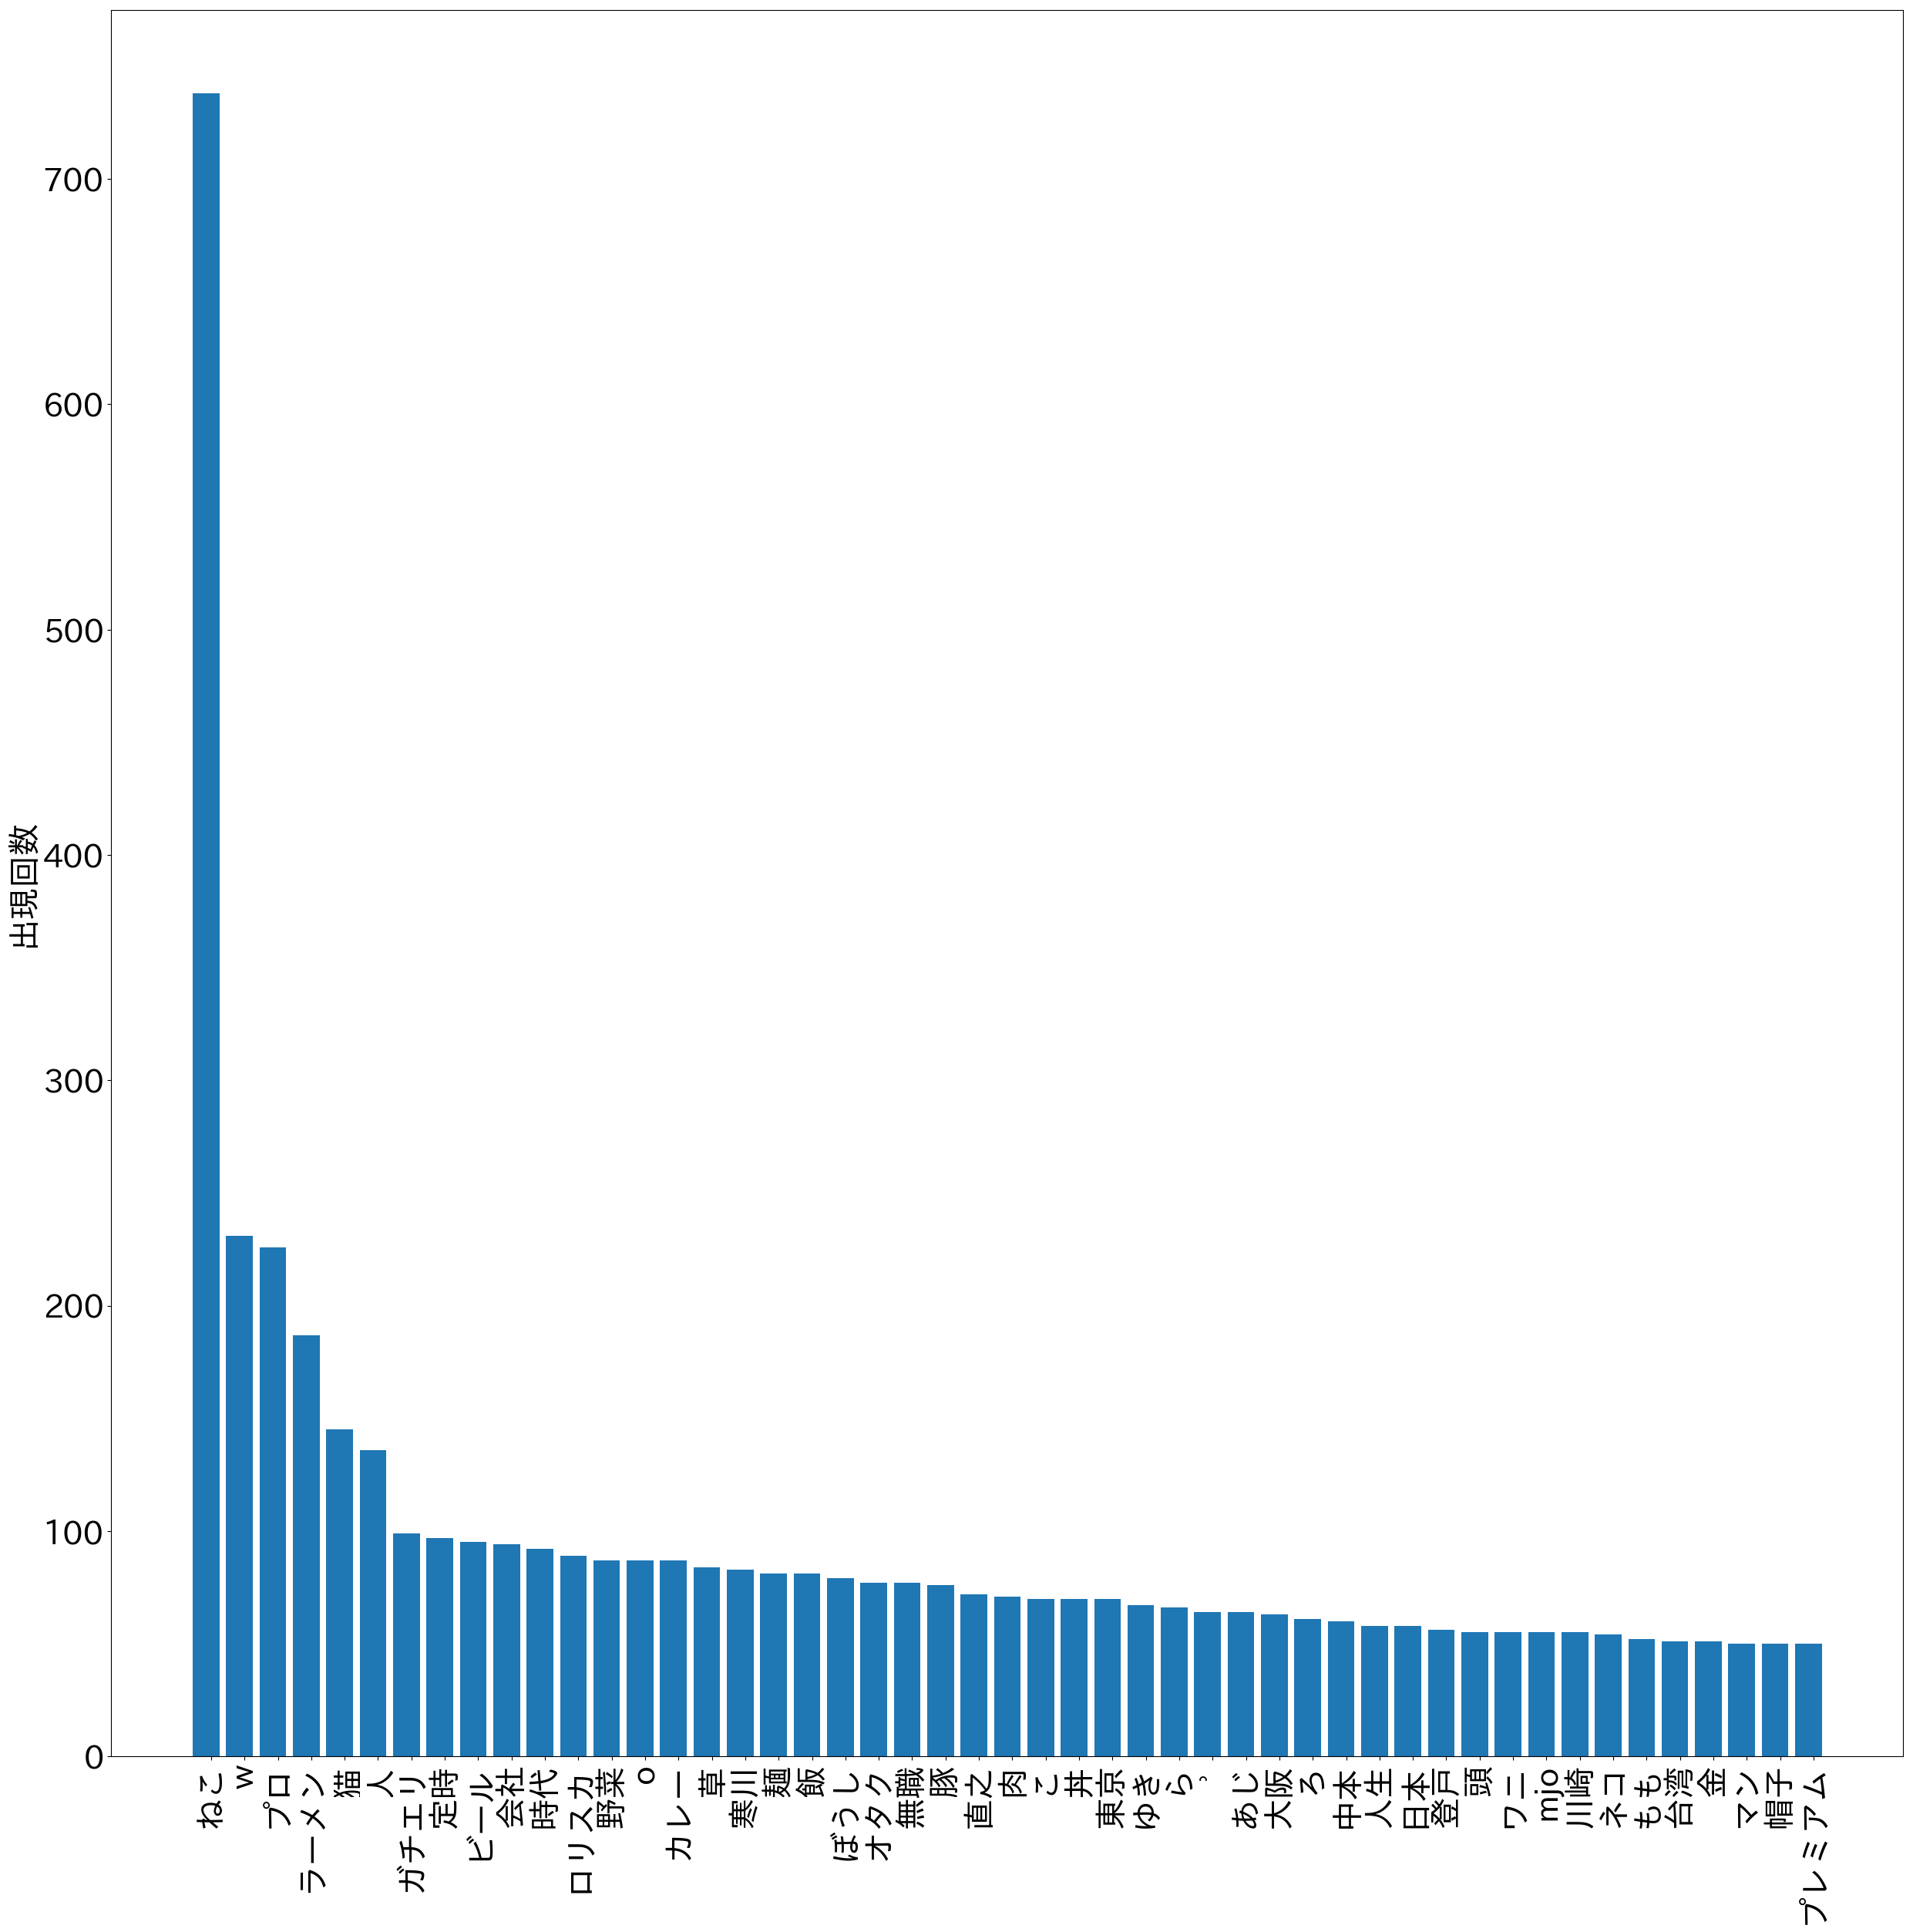

In [27]:
import pandas as pd
import MeCab
import re
import matplotlib

csv_file = 'tweets.csv'
df = pd.read_csv(csv_file, encoding='utf-8', header=0)
# df = df.head()
df = df[df['retweeted_status_id'].isnull()]
df = df[df['source'].str.match('^(?!.*foursquare).*$')]
df = df[df['text'].str.match('^(?!.*@YouTube).*$')]
df = df[df['text'].str.match('^(?!NowBrowsing:).*$')]
df = df[df['text'].str.match('^(?!.*@.*さんから).*$')]


# remove @hogehoge from tweet
pattern = '(@\S+\s)|(http\S+)|(#\S+)'

m = MeCab.Tagger("-Ochasen")

result = {}

for v in df['text']:
    posts = re.sub(pattern, '', v, 10)
    for post  in m.parse(posts).split('\n'):
        p = post.split('\t')
        if p[0] == 'EOS' or p[0] == '':
            continue
        if p[3].startswith("名詞-固有名詞") or p[3].startswith("名詞-一般"):
            if re.match( 'ー+', p[0]):
                continue
            if p[0] in result:
                result[p[0]] += 1
            else :
                result[p[0]] = 1


import numpy as np
import matplotlib.pyplot as plt                
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)


keys = np.array([k for k, v in result.items()])
values = np.array([int(result[i]) for i in keys])


arg = values.argsort()
sorted_keys = np.array([keys[i] for i in arg[::-1]])
sorted_value = np.array([values[i] for i in arg[::-1]])

for i, v in enumerate(sorted_value):
    if v < 50:
        sorted_value = sorted_value[:i]
        sorted_keys = sorted_keys[:i]
        break


x = np.arange(len(sorted_keys)) 
w = 0.3


plt.figure(figsize=(30,30),dpi=100)
plt.ylabel("出現回数", fontsize=30)
plt.tick_params(labelsize=30)
plt.bar(x,sorted_value, label='sum', align="center")
plt.xticks(x + w/2, sorted_keys, rotation=90, fontsize=30)
plt.show()


